# LSIの配線のインピーダンス解析

Conductor 1 charge density range: 1.429944049173709e-12 3.5207418165784302e-12
Conductor 1 total charge: 3.191291745034958e-19
Conductor 2 charge density range: -4.9018428070106534e-12 -2.0721158891950663e-12
Conductor 2 total charge: -4.527042291520365e-19
Conductor 3 charge density range: 2.840415180652146e-12 6.848698850207612e-12
Conductor 3 total charge: 6.220120877933381e-19


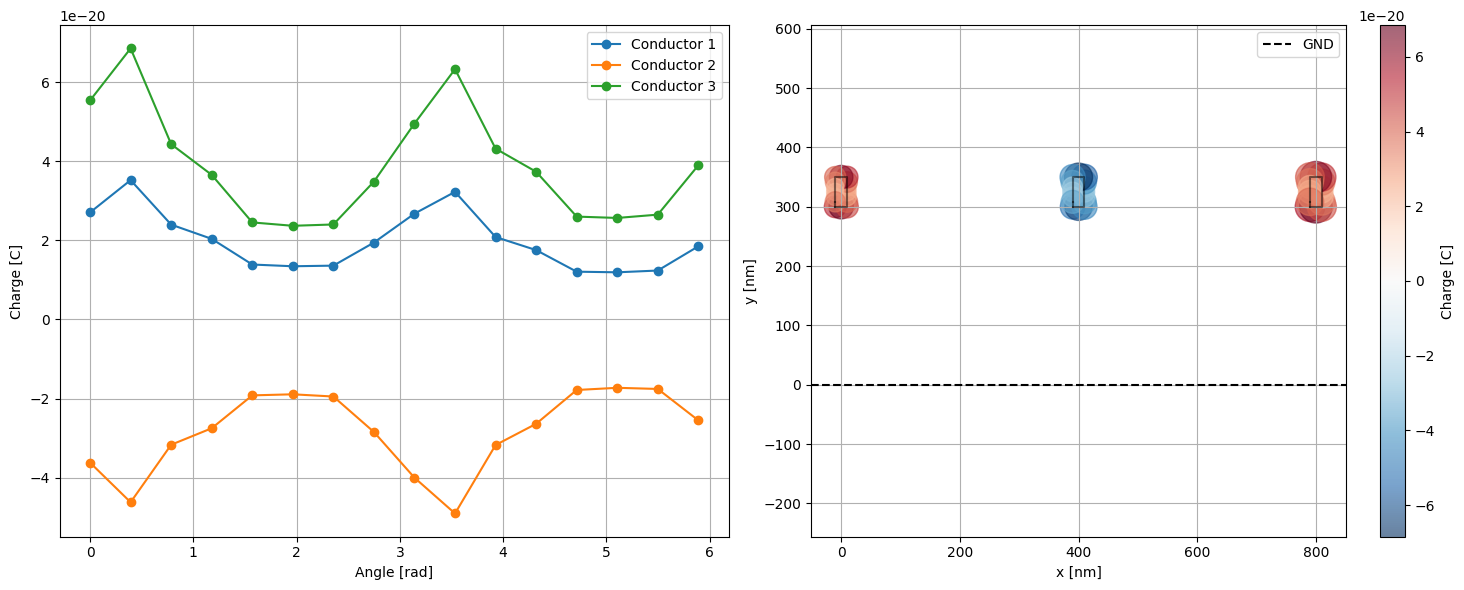

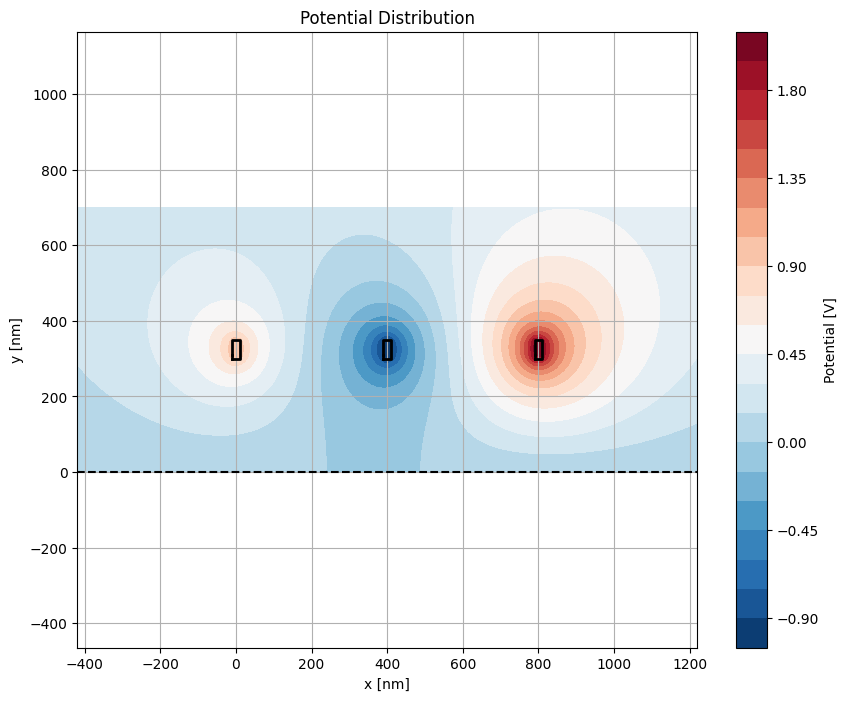

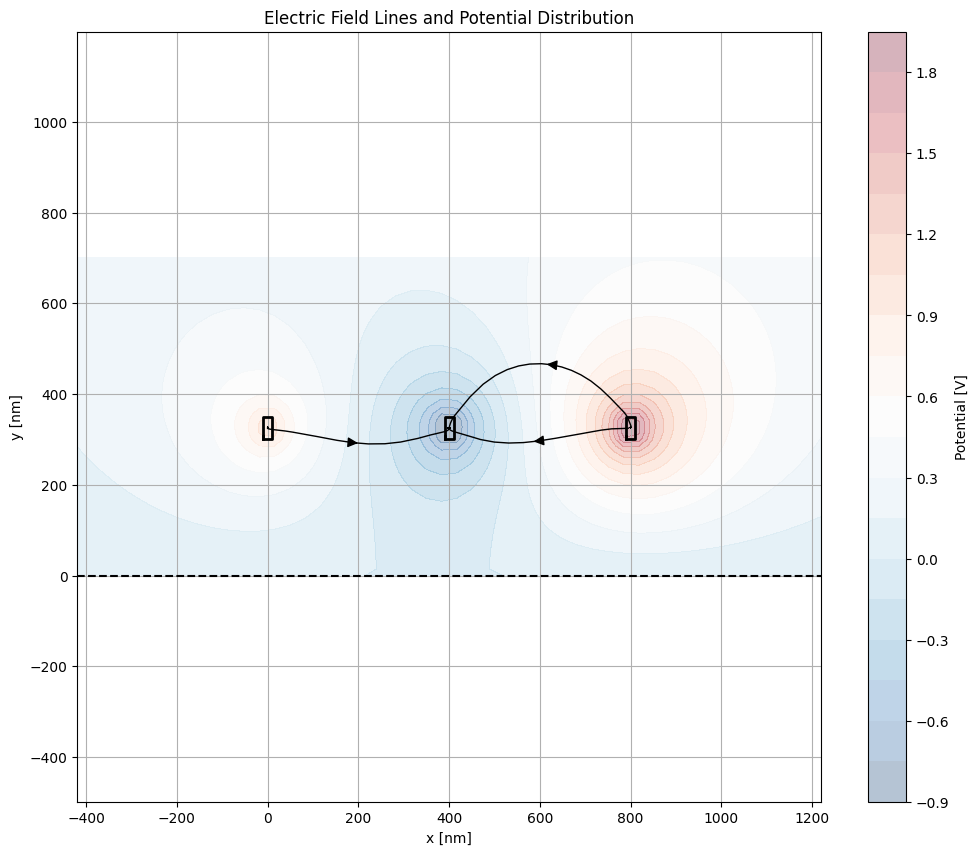


 C Matrix [F/m]:
[[ 3.27389304e-11 -5.73207208e-12 -1.30011571e-12]
 [-5.73207208e-12  3.37011908e-11 -5.73207208e-12]
 [-1.30011571e-12 -5.73207208e-12  3.27389304e-11]]

 L Matrix [H/m]:
[[7.04170737e-07 1.28347289e-07 5.04353480e-08]
 [1.28347289e-07 7.03949041e-07 1.28347289e-07]
 [5.04353480e-08 1.28347289e-07 7.04170737e-07]]

 Z Matrix [H/m]:
[[152.11093837  91.72021945  62.70790996]
 [ 91.72021945 154.10929143  91.72021945]
 [ 62.70790996  91.72021945 152.11093837]]
Capacitance matrix has been saved to ./out/test_rect3x1.csv
Conductor 1 charge density range: -2.1103433020873792e-13 -3.904670879477371e-14
Conductor 1 total charge: -1.8188881203268418e-20
Conductor 2 charge density range: -4.722614700787135e-12 -7.50357781592957e-13
Conductor 2 total charge: -2.407386524337816e-19
Conductor 3 charge density range: 1.5888418602990176e-12 5.22533003596866e-12
Conductor 3 total charge: 3.711142157637923e-19
Conductor 4 charge density range: -4.722614700787094e-12 -7.503577815929618

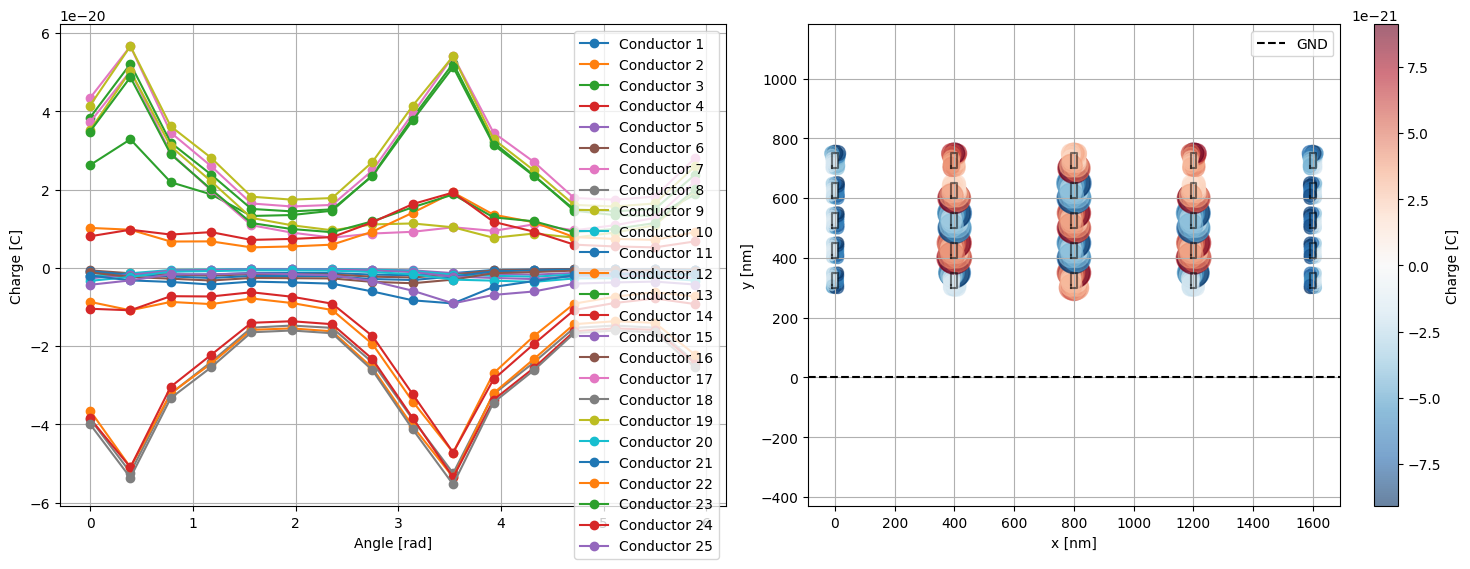

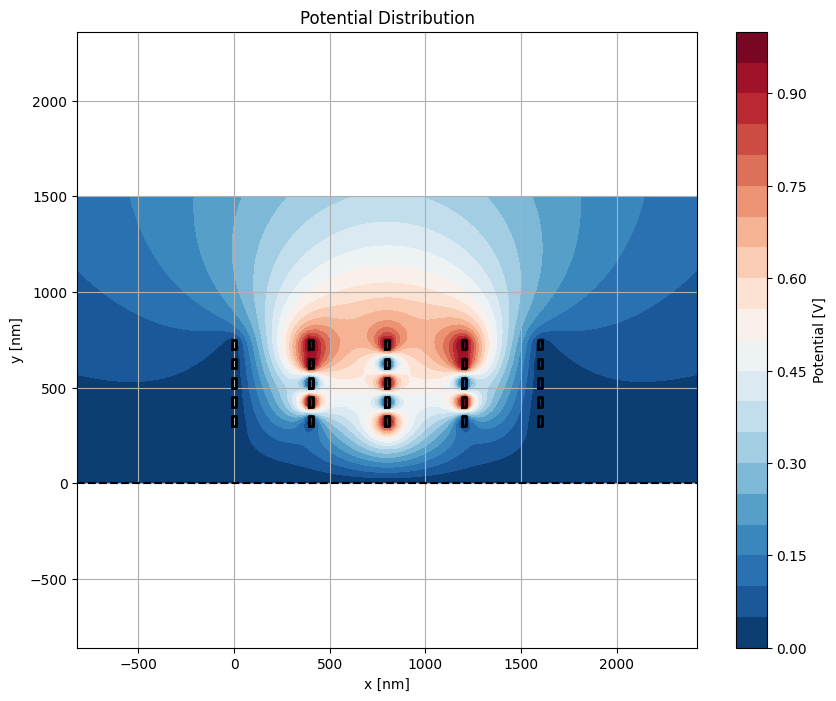

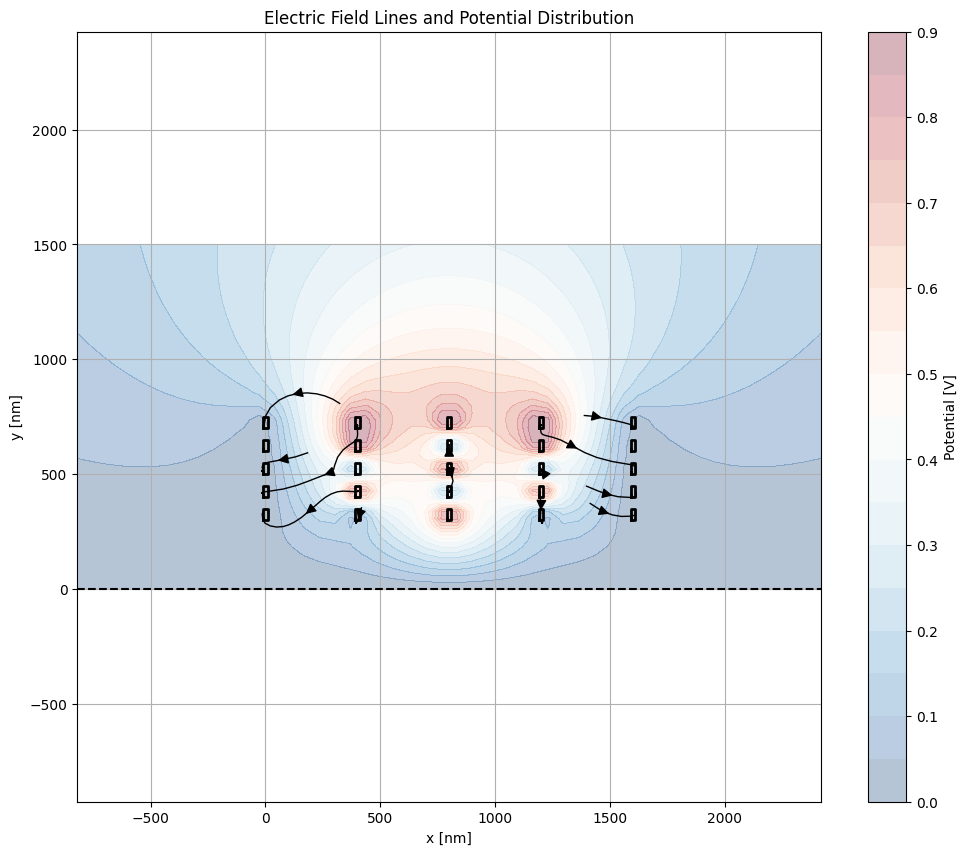


 C Matrix [F/m]:
[[ 4.83900649e-11 -1.90595275e-12 -5.83111054e-14 -3.02317123e-15
  -2.29365773e-15 -2.25912705e-11 -1.11587355e-12 -2.96360027e-14
  -2.66614111e-15 -2.76362635e-15 -3.38284165e-12 -6.98965979e-13
  -2.20681277e-14 -4.29144003e-15 -4.40883295e-15 -1.34858889e-12
  -4.09052200e-13 -2.49795927e-14 -8.99466835e-15 -7.97862735e-15
  -9.70785984e-13 -3.46489621e-13 -6.28844881e-14 -3.07537369e-14
  -2.36485466e-14]
 [-1.90595275e-12  4.87372178e-11 -1.89460128e-12 -5.69632779e-14
  -3.02317123e-15 -1.11697940e-12 -2.22987980e-11 -1.10712235e-12
  -2.76378363e-14 -2.21563077e-15 -6.96993013e-13 -3.09506134e-12
  -6.86836607e-13 -1.79363823e-14 -2.68269300e-15 -3.96685290e-13
  -1.06608581e-12 -3.86145410e-13 -1.56062103e-14 -4.37440814e-15
  -2.90042048e-13 -5.73721739e-13 -2.74630435e-13 -3.02718015e-14
  -1.25259324e-14]
 [-5.83111054e-14 -1.89460128e-12  4.87376003e-11 -1.89460128e-12
  -5.83111054e-14 -2.89526886e-14 -1.10709414e-12 -2.22984854e-11
  -1.10709414e-12 -2

In [3]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# RECT 3x1のテスト
def test_rect3x1():
  calculator = MultiConductorCalculator(epsilon_r=2.0)
  w = 20e-9
  h = 50e-9
  n = 20
  bh1 = 300e-9
  xo1 = 0
  xo2 = 400e-9
  xo3 = 800e-9

  # Add rectangular conductor
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )

  voltages = [1.0,-1.0, 2.0]
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density) 
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # fF/1umで出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_rect3x1.csv", unit_prefix='f' , length=1e-6 )


# RECT 5x5のテスト
def test_rect5x5():
  calculator = MultiConductorCalculator(epsilon_r=2.0)
    
  w = 20e-9
  h = 50e-9
  n = 20
  bh1 = 300e-9
  bh2 = 400e-9
  bh3 = 500e-9
  bh4 = 600e-9
  bh5 = 700e-9
  xo1 = 0
  xo2 = 400e-9
  xo3 = 800e-9
  xo4 = 1200e-9
  xo5 = 1600e-9
    
  # Add rectangular conductor
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh2, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh3, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh4, N_points=n, x_offset=xo5  )

  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo1  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo2  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo3  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo4  )
  calculator.add_rectangular_conductor( width=w, height=h, base_height=bh5, N_points=n, x_offset=xo5  )

  # Modified voltages array to match the number of conductors
  voltages = [0.0 ,0.0, 1.0, 0.0, 0.0,
              0.0 ,1.0, 0.0, 1.0, 0.0,
              0.0 ,0.0, 1.0, 0.0, 0.0,
              0.0 ,1.0, 0.0, 1.0, 0.0,
              0.0 ,1.0, 1.0, 1.0, 0.0]  # Only one voltage for one conductor
  
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density) 
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # fF/1umで出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_rect5x5.csv", unit_prefix='f' , length=1e-6 )


if __name__ == "__main__":
  test_rect3x1()
  test_rect5x5()
